# Nube de Palabras (WordCloud)
Es un gráfico sin ejes que muestra diversas palabras pertenecientes a un texto o a un grupo de textos. El tamaño de cada palabra codifica que tan "importante" es la palabra dentro del texto o de los textos. Esta "importancia" puede significar diferentes métricas: Frecuencia Absoluta, Frecuencia Relativa, TF-IDF, etc. Usualmente es el primer gráfico que se realiza como exploración cuando queremos aplicar algoritmos de Machine Learning a texto. 

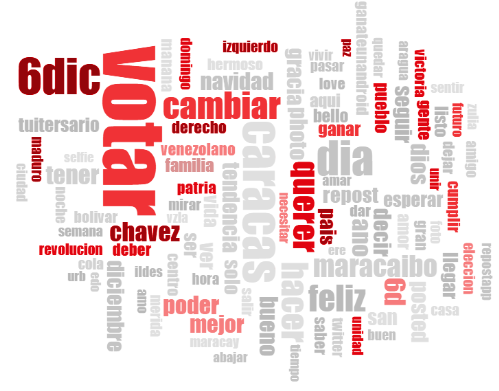

### Consejos
- Su propósito no es representar presición. Es utilizado más a modo de presentación o inspección rápida.
- Si quiero presentar con presición cuales son las palabras más "importantes" de mi texto es preferible un gráfico de barras (Eje X: cada palabra, Eje Y: medida de importancia de cada palabra).
- Puedo darle forma a mi WordCloud para hacerlo más llamativo

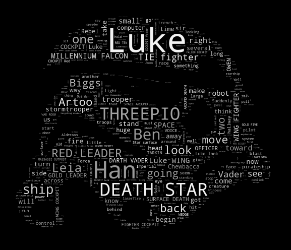

## Referencias
- https://datavizcatalogue.com/methods/wordcloud.html

In [1]:
%pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 4.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.2.2-cp310-cp310-macosx_12_0_arm64.whl size=154637 sha256=50e9cf348a23563af087a3d432d3079b4a1a13a438173f2bec033f9d29386339
  Stored in directory: /Users/leonardokuffo/Library/Caches/pip/wheels/30/52/73/36458d38e3c533678a3043949ad72658025d8e89d942439d49
Successfully built wordcloud

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/marcas_mensajes_twitter.csv')
df

,Unnamed: 0,idx,brand-experience,class,classification,created_at,customer-service,cx_brand,digital-experience,events,...,index,lang,message,probabilities,sentiment,tokenized,tweet_url,type,google_sentiment_score,google_sentiment_measure
0,0,0,0.000000,4,events,Thu Oct 04 15:59:56 +0000 2018,0.000000,adidasoriginals,0.000000,1.0,...,233,en,Shout out @adidasoriginals for having me down ...,NaN,-0.542300,shout shoot cut adidas sneaker con store event...,https://twitter.com/IAMDJCHUX/status/104787899...,1,0.4,1.4
1,1,1,0.000000,4,events,Thu Oct 04 01:23:46 +0000 2018,0.000000,BedBathBeyond,0.000000,1.0,...,889,en,@BedBathBeyond that time I went to you DT seat...,NaN,0.000000,time went seattle store closing event cashier ...,https://twitter.com/mahenry/status/10476585037...,1,-0.7,0.7
2,2,2,0.000000,4,events,Sat Sep 29 00:59:07 +0000 2018,0.000000,Hermes_Paris,0.000000,1.0,...,934,en,@Hermes_Paris I need to go to this event pleas...,NaN,0.585900,need event please put list thank need list,https://twitter.com/funnyithink1/status/104584...,1,0.4,0.9
3,3,3,0.000000,4,events,Thu Oct 04 18:37:17 +0000 2018,0.000000,jcpenney,0.000000,1.0,...,1096,en,Suit-Up!In partnership with @jcpenney next Sat...,NaN,0.000000,suit partnership next sat msu take students jc...,https://twitter.com/MorganStateU/status/104791...,1,0.3,0.3
4,4,4,0.000000,4,events,Fri Sep 28 12:00:58 +0000 2018,0.000000,Loreal,0.000000,1.0,...,1345,en,👉 | Ever wondered what it takes to work for a ...,NaN,0.361200,ever wondered takes work company like running ...,https://twitter.com/AstonCareers/status/104564...,1,-0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53509,53509,101825,0.038267,0,digital-experience,Mon Apr 15 19:17:33 +0000 2019,0.359278,BNBuzz,0.596595,NaN,...,97185,en,@BNBuzz Hello do you know if your site is expe...,"[0.038267060478025416, 0.35927809868248184, 0....",0.242857,hello know site experiencing issues right tryi...,https://twitter.com/McGrubbin/status/111786958...,1,-0.1,1.9
53510,53510,101827,0.087985,3,customer-service,Mon Apr 15 00:43:22 +0000 2019,0.439944,BNBuzz,0.389421,NaN,...,97187,en,Hey @BNBuzz - was disappointed today to discov...,"[0.08798487773051575, 0.4399439711795116, 0.38...",-0.325000,hey disappointed today discover someone paid m...,https://twitter.com/LegallyHEA/status/11175891...,1,-0.7,0.7
53511,53511,101832,0.059421,3,customer-service,Sat Apr 13 22:50:35 +0000 2019,0.598173,BNBuzz,0.039001,NaN,...,97192,en,Just called @BNBuzz to reserve my copy of #mil...,"[0.05942064232978142, 0.5981729262481892, 0.03...",0.000000,called reserve copy millenneagram pick store c...,https://twitter.com/maggsical/status/111719842...,1,0.8,1.6
53512,53512,101834,0.011430,0,digital-experience,Sat Apr 13 20:46:24 +0000 2019,0.385919,BNBuzz,0.435974,NaN,...,97194,en,I'll never buy an ebook from @BNBuzz again. I ...,"[0.011430311521668266, 0.3859185518124338, 0.4...",0.829000,never buy ebook gift card work order support t...,https://twitter.com/Laurenipal10/status/111716...,1,-0.7,3.0


In [7]:
df = df.drop_duplicates(subset=['message'])

In [8]:
texto = ' '.join(df['tokenized'])

(-0.5, 999.5, 699.5, -0.5)

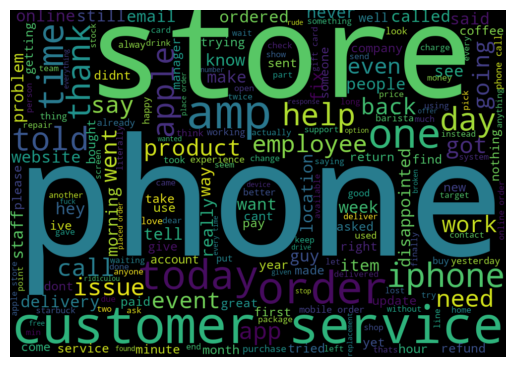

In [11]:
# Wordcloud con Matplotlib y una libreria adicional 
# https://github.com/amueller/word_cloud
wc = WordCloud(
    width=1000,
    height=700,
    margin=0,
    background_color='black' # white
).generate(texto)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [13]:
from PIL import Image
import numpy as np

In [29]:
tw_color = np.array(Image.open('../data/twitter.jpeg'))
tw_mask = tw_color.copy()
tw_mask[tw_mask.sum(axis=2) == 0] = 255

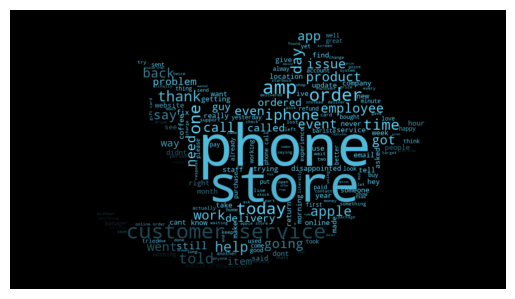

In [30]:
wc = WordCloud(
    margin=0,
    mask=tw_mask
).generate(texto)

image_colors = ImageColorGenerator(tw_color)
wc.recolor(color_func=image_colors)

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
wc.to_file("./wc_tw.png")

## Wordclouds sin Python

También pueden generar Wordclouds con herramientas online con una interfaz grafica:
https://www.nubedepalabras.es/